In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('data/Air_pollution.csv', index_col='city')

In [97]:
df.head()

,country,2017,2018,2019,2020,2021,2022,2023
city,,,,,,,,
Kabul,Afghanistan,NaN,61.8,58.8,46.5,37.5,17.1,18.1
Tirana,Albania,NaN,NaN,NaN,16.0,12.5,14.5,14.4
Algiers,Algeria,NaN,NaN,21.2,20.2,20.0,17.8,17.4
Ordino,Andorra,NaN,NaN,NaN,7.4,7.3,5.4,5.3
Luanda,Angola,NaN,NaN,15.9,13.0,11.0,8.8,8.7


In [98]:
df.dtypes

country     object
2017       float64
2018       float64
2019       float64
2020       float64
2021       float64
2022       float64
2023       float64
dtype: object

In [99]:
df.fillna(0,inplace=True)


In [100]:
df

,country,2017,2018,2019,2020,2021,2022,2023
city,,,,,,,,
Kabul,Afghanistan,0.0,61.8,58.8,46.5,37.5,17.1,18.1
Tirana,Albania,0.0,0.0,0.0,16.0,12.5,14.5,14.4
Algiers,Algeria,0.0,0.0,21.2,20.2,20.0,17.8,17.4
Ordino,Andorra,0.0,0.0,0.0,7.4,7.3,5.4,5.3
Luanda,Angola,0.0,0.0,15.9,13.0,11.0,8.8,8.7
...,...,...,...,...,...,...,...,...
Thanh Pho Lang Son,Vietnam,0.0,0.0,0.0,0.0,36.8,14.6,15.0
Thu Duc,Vietnam,0.0,0.0,0.0,0.0,20.1,24.5,24.5
Tra Vinh,Vietnam,0.0,0.0,0.0,0.0,6.2,5.5,5.5


In [101]:
df['2017'].mean()

5.484668336912431

In [102]:
filt = df['country']=='Kenya'
df[filt].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_30152\382189608.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[filt].mean()


2017     0.00
2018     0.00
2019     0.00
2020     7.35
2021     7.15
2022    11.20
2023    11.20
dtype: float64

In [103]:
numeric_cols = df.select_dtypes(include='number')

# Define aggregation functions
aggregations = {
    '2017': 'mean',
    '2023': 'max',
    '2019': 'median'
}

# Apply agg() to calculate multiple aggregates for each numeric column
result = numeric_cols.agg(aggregations)
result

2017     5.484668
2023    97.400000
2019     4.900000
dtype: float64

In [104]:
filt_country = df[(df !=0).all(axis=1)]
filt_country

,country,2017,2018,2019,2020,2021,2022,2023
city,,,,,,,,
Albury,Australia,7.3,7.3,11.0,17.3,11.3,6.9,6.9
Bathurst,Australia,6.1,7.0,13.1,8.7,10.3,4.6,4.6
Beresfield,Australia,7.6,8.7,13.6,10.6,10.2,5.4,5.4
Boat Creek,Australia,5.1,5.5,7.8,5.8,5.0,5.1,5.1
Bream Creak,Australia,2.5,4.4,4.3,4.0,3.0,3.3,3.3
...,...,...,...,...,...,...,...,...
Warrington,United Kingdom,9.7,9.0,11.4,8.5,8.0,7.2,7.2
Watford,United Kingdom,10.0,9.2,9.1,8.1,8.2,8.4,8.4
York,United Kingdom,9.5,9.8,9.6,7.9,7.0,7.6,7.6


In [105]:
filt_country.to_csv('nonZeroCountry.csv')

In [106]:
grouped_country = df.groupby('country').mean()
grouped_country = grouped_country.reset_index()

# Select numeric columns for calculations
numeric_cols = grouped_country.select_dtypes(include=['float64', 'int64']).columns

# Calculate mean, max, and median pollution levels for each country
new_df = pd.DataFrame({
    'country': grouped_country['country'],
    'mean_pollution': grouped_country[numeric_cols].mean(axis=1),
    'max_pollution': grouped_country[numeric_cols].max(axis=1),
    'median_pollution': grouped_country[numeric_cols].median(axis=1)
})
new_df

,country,mean_pollution,max_pollution,median_pollution
0,Afghanistan,34.257143,61.8,37.500
1,Albania,8.200000,16.0,12.500
2,Algeria,13.800000,21.2,17.800
3,Andorra,3.628571,7.4,5.300
4,Angola,8.200000,15.9,8.800
...,...,...,...,...
128,Uruguay,5.257143,14.2,0.000
129,Uzbekistan,30.514286,42.8,33.500
130,Venezuela,2.042857,5.4,0.000
131,Vietnam,8.637857,16.3,4.905


In [107]:
aust_info= df['country']=='Australia'
df[aust_info]['2017'].max()

11.2

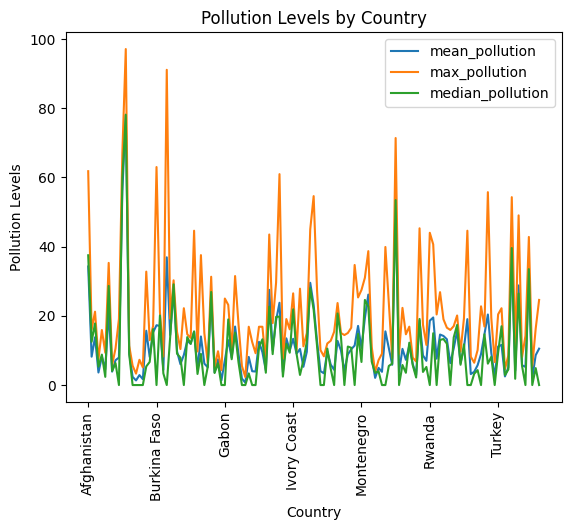

In [114]:
%matplotlib inline
new_df.plot(x='country', y=['mean_pollution', 'max_pollution', 'median_pollution'], kind='line')

# Display the plot
plt.xlabel('Country')
plt.ylabel('Pollution Levels')
plt.title('Pollution Levels by Country')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.legend()
plt.show()

In [109]:
new_df.to_excel('data/mean_pollution.xlsx')


In [110]:
df.reset_index(inplace=True)

# Reshape the DataFrame from wide to long format using melt
melted_df = pd.melt(df, id_vars=['city', 'country'], var_name='year', value_name='pollution', value_vars=df.columns[2:])

# Display the reshaped DataFrame
melted_df

,city,country,year,pollution
0,Kabul,Afghanistan,2017,0.0
1,Tirana,Albania,2017,0.0
2,Algiers,Algeria,2017,0.0
3,Ordino,Andorra,2017,0.0
4,Luanda,Angola,2017,0.0
...,...,...,...,...
48890,Thanh Pho Lang Son,Vietnam,2023,15.0
48891,Thu Duc,Vietnam,2023,24.5
48892,Tra Vinh,Vietnam,2023,5.5
48893,Trang Bang,Vietnam,2023,12.4
